In [157]:
import pandas as pd
import numpy as np
import locale
locale.setlocale(locale.LC_NUMERIC, "de_DE")
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(r'M:\Betrieb_ISF\Gruppe_A_Orga\Arbeitsgebiete\Python_Auswerteskripte')
from plotting import *
plt.rcParams['figure.facecolor'] = 'white'
plt.style.use(r'style\example_file.mplstyle')
exportpath=r'M:\Öff gef Forschung\Projekte\AiF DVS\A0316_AIF 20439_Festigkeitsbewertung_chr\Abschlussbericht, Veröff\2022-DVS-Congress\Bilder'


plot functions setup

In [158]:
cm=2.54
def real_to_relative(fig,rect):#inches as input
    fig_width,fig_height=fig.get_size_inches()
    width=rect[2]
    height=rect[3]
    properties=[rect[0]/fig_width,rect[1]/fig_height,width/fig_width,height/fig_height]
    return properties

def fig_setup(width,height,style,dpi):#input cm
    """
    :param width: figure width in cm
    :param height: figure height in cm
    :return: matplotlib figure
    """
    cm=2.54
    import matplotlib.pyplot as plt
    #plt.style.use(style)
    figure=plt.figure(figsize=(width/cm,height/cm),dpi=dpi)
    return figure

def ax_setup(fig,margin_left,margin_bottom,boxwidth,boxheight):#cm input
    fig_width,fig_height=fig.get_size_inches()
    #width=(fig_width*cm)-margin_left-margin_right
    #height=(fig_height*cm)-margin_top-margin_bottom
    position_size=[margin_left/cm,margin_bottom/cm,boxwidth/cm,boxheight/cm]#inch
    axis=fig.add_axes(real_to_relative(fig,position_size))
    return axis

def subplots(figsize=(12,8), marginleft=1, marginbottom=1, databox_width=16, databox_height=5, style=None,dpi=120):#input cm
    fig=fig_setup(figsize[0],figsize[1],style,dpi=dpi)
    ax=ax_setup(fig, marginleft, marginbottom, databox_width, databox_height)
    return fig,ax

def mult_save(fig,path,name):
    pgf=os.path.join(path,name+'.pgf')
    png=os.path.join(path,name+'.png')
    svg=os.path.join(path,name+'.svg')

    #fig.savefig(pgf)
    fig.savefig(png,dpi=1000)
    fig.savefig(svg)


cmap setup

In [159]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
nodes = [0,0.45, 0.5,  0.55,1]
colors = ['#890056','#B06000', '#74A500', '#B06000', '#890056']
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
from matplotlib import cm as cms
viridis= cms.get_cmap('viridis', 21)

import von Daten

In [160]:
path=r"Y:\Istra Repositories\ch-gr_exports"
_8mmGW=pd.read_pickle(os.path.join(path,'MC_A_8xiii_clipped_cut.pickle'),compression='zip')
_8mmSG=pd.read_pickle(os.path.join(path,'QL_A_8xii_clipped_cut.pickle'),compression='zip')
_6mmSG=pd.read_pickle(os.path.join(path,'QL_A_6xiii_clipped_cut.pickle'),compression='zip')



In [161]:
#display(_8mmSG,_6mmSG,_8mmGW)

vorhandene Daten

In [162]:
display(_8mmSG.columns)

MultiIndex([(     'add_data',    'analog_channels'),
            (  'coordinates',       'coordinate_x'),
            (  'coordinates',       'coordinate_y'),
            (  'coordinates',       'coordinate_z'),
            ('displacements', 'displacement_total'),
            (      'strains',          'strain_p1'),
            (      'strains',          'strain_p2'),
            (      'strains',          'strain_xx'),
            (      'strains',          'strain_xy'),
            (      'strains',          'strain_yy')],
           names=['group', 'dataset'])

In [163]:
df=_8mmSG
force8SG=[i[0][0]*60000/200 for i in df.loc[:,(     'add_data',             'analog_channels')]]
p10=np.nanmean(np.nanmean(df.loc[df.index[0],(      'strains',                   'strain_p1')]))
strain8SG=[np.nanmean(np.nanmean(i))-p10 for i in df.loc[:,(      'strains',                   'strain_p1')]]

In [164]:
df=_6mmSG
force6SG=[i[0][0]*60000/120 for i in df.loc[:,(     'add_data',             'analog_channels')]]
p10=np.nanmean(np.nanmean(df.loc[df.index[0],(      'strains',                   'strain_p1')]))
strain6SG=[np.nanmean(np.nanmean(i))-p10 for i in df.loc[:,(      'strains',                   'strain_p1')]]

In [165]:
df=_8mmGW
force8GW=[i[0][0]*60000/200 for i in df.loc[:,(     'add_data',             'analog_channels')]]
p10=np.nanmean(np.nanmean(df.loc[df.index[0],(      'strains',                   'strain_p1')]))
strain8GW=[np.nanmean(np.nanmean(i))-p10 for i in df.loc[:,(      'strains',                   'strain_p1')]]

integrale Kurven wenn man sie brauchen sollte


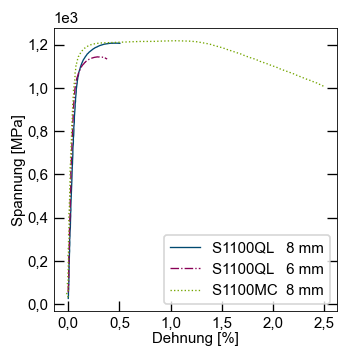

In [166]:
fig, ax=subplots((8,8),1.5,1,6,6)

ax.plot([i*100 for i in strain8SG],force8SG,label='S1100QL   8 mm')
ax.plot([i*100 for i in strain6SG],force6SG,label='S1100QL   6 mm')
ax.plot([i*100 for i in strain8GW],force8GW,label='S1100MC  8 mm')
ax.set_xlabel('Dehnung [%]')
ax.set_ylabel('Spannung [MPa]')
ax.legend()
mult_save(fig,exportpath,'stress_strain_combined')

In [167]:
def crop(array):
    #a=array[:,~np.all(np.isnan(array), axis=0)]
    b=array[~np.all(np.isnan(array), axis=1),:]
    return b
def get_resolution(maskedx):
    midy=int(crop(maskedx).shape[0]/2)
    midx=int(crop(maskedx).shape[1]/2)
    lower=midy-int(midy/2)
    upper=midy+int(midy/2)
    delta=upper-lower
    resolution=abs((crop(maskedx)[upper,midx]-crop(maskedx)[lower,midx])/delta)
    return resolution
def get_measurement_points(resolution, width_mm, center_idx,spacing_mm,y_idx):

    point_number_one_direction=int(width_mm/spacing_mm/2)
    #print(point_number_one_direction)
    pointsdirection=[int(i/resolution) for i in np.arange(0,int(width_mm/2)+1,spacing_mm)]
    #print(pointsdirection)
    pointsplus=[center_idx+i for i in pointsdirection]
    #print(pointsplus)
    pointsminus=[center_idx-i for i in pointsdirection[1:]]
    #print(pointsminus)
    pointstuples=[(i,y_idx) for i in pointsminus+pointsplus]
    #display(pointstuples)
    return pointstuples
def get_horizontal_middle(dffull):
    x=dffull.loc[dffull.index[-1] ,(  'coordinates',       'coordinate_x')]
    a=dffull.loc[dffull.index[-1] ,('strains','strain_p1')]
    mask=np.where(x==0,True,False)
    maskeda=np.ma.masked_array(a,mask)
    adf=pd.DataFrame(maskeda).dropna(how='all',axis=0).dropna(how='all',axis=1)
    #display(np.mean(adf.index))
    return(np.mean(adf.index))

def get_data_from_points2df(seriesofarrays,pointtuples):
    df=pd.DataFrame(columns=[str(i) for i in pointtuples],index=seriesofarrays.index)
    #display(seriesofarrays)
    #plt.matshow(seriesofarrays[df.index[30]])
    for point in pointtuples:
        cols=[]
        for idx in df.index:
            cols.append(seriesofarrays[idx][point[1],point[0]]*100)
        df[str(point)]=cols
    #display(df)
    return df
resolution=0.47749918083374576
def smooth_columnsofdf(df):
    from scipy.signal import savgol_filter as savgol
    df=df.copy()
    for col in df.columns:
        df[col]=savgol(df[col].values,21,3)
    df[df<0]=0
    return(df)

In [168]:
_6mmSG_points=get_data_from_points2df(_6mmSG.loc[:,('strains','strain_p1')],sorted(get_measurement_points(resolution,40,95,2,int(get_horizontal_middle(_6mmSG)))))
_8mmSG_points=get_data_from_points2df(_8mmSG.loc[:,('strains','strain_p1')],sorted(get_measurement_points(resolution,40,115,2,int(get_horizontal_middle(_8mmSG)))))
_8mmGW_points=get_data_from_points2df(_8mmGW.loc[:,('strains','strain_p1')],sorted(get_measurement_points(resolution,40,117,2,int(get_horizontal_middle(_8mmGW)))))

_6mmSG_points_smooth=smooth_columnsofdf(_6mmSG_points)
_8mmSG_points_smooth=smooth_columnsofdf(_8mmSG_points)
_8mmGW_points_smooth=smooth_columnsofdf(_8mmGW_points)


Zeitliche Entwicklung der Dehnung in den Messpunkten

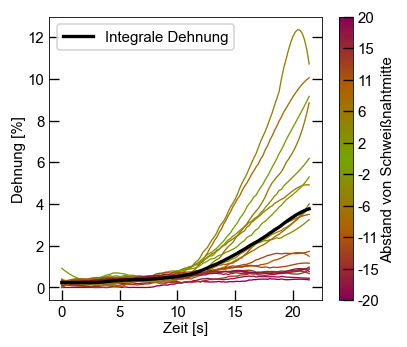

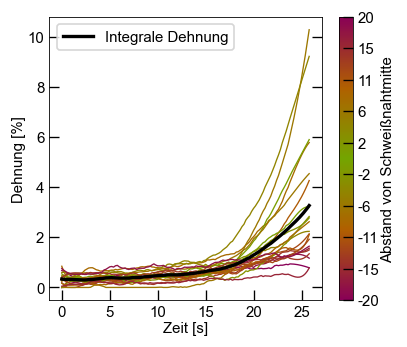

In [261]:
fig, ax=subplots((9,8),1,1,7.2,6)
df=_6mmSG_points_smooth
columnlength=len(df.columns)
from matplotlib import colors
values= range(columnlength)
norm=colors.Normalize(0,columnlength,clip=True)
mapper=cms.ScalarMappable(norm=norm,cmap=cmap1)


for idx,col in enumerate(df.columns):
    ax.plot(np.arange(len(df.index))/5,df[col],'-',color=mapper.to_rgba(idx))
ax.plot(np.arange(len(df.index))/5,df.mean(axis=1),lw=2,color='k',label='Integrale Dehnung')
ax.set_xlabel('Zeit [s]')
ax.set_ylabel('Dehnung [%]')
"""ax.text(5.5,1.8,'Integrale Dehnung',ha='center',va='bottom')
#ax.arrow(,,zorder=10,arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(5,1.8), xytext=(10,0.7),
            arrowprops=dict(arrowstyle="<-"))"""
cb=fig.colorbar(mapper)
cb.set_ticks(np.linspace(0,21,10))
cb.set_ticklabels(np.linspace(-20,20,10).astype(int))
cb.set_label('Abstand von Schweißnahtmitte')
ax.legend()
plt.show()
mult_save(fig,exportpath,'blumenstrauß_6mmSG')

fig, ax=subplots((9,8),1,1,7.2,6)
df=_8mmSG_points_smooth
columnlength=len(df.columns)
from matplotlib import colors
values= range(columnlength)
norm=colors.Normalize(0,columnlength,clip=True)
mapper=cms.ScalarMappable(norm=norm,cmap=cmap1)


for idx,col in enumerate(df.columns):
    ax.plot(np.arange(len(df.index))/5,df[col],'-',color=mapper.to_rgba(idx))
ax.plot(np.arange(len(df.index))/5,df.mean(axis=1),lw=2,color='k',label='Integrale Dehnung')
ax.set_xlabel('Zeit [s]')
ax.set_ylabel('Dehnung [%]')
"""ax.text(5.5,1.8,'Integrale Dehnung',ha='center',va='bottom')
#ax.arrow(,,zorder=10,arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(5,1.8), xytext=(10,0.7),
            arrowprops=dict(arrowstyle="<-"))"""
cb=fig.colorbar(mapper)
cb.set_ticks(np.linspace(0,21,10))
cb.set_ticklabels(np.linspace(-20,20,10).astype(int))
cb.set_label('Abstand von Schweißnahtmitte')
ax.legend()
plt.show()
mult_save(fig,exportpath,'blumenstrauß_8mmSG')

örtliche Verteilung der Dehnung im letzten Schritt vor dem Bruch

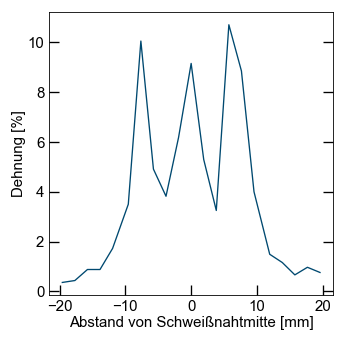

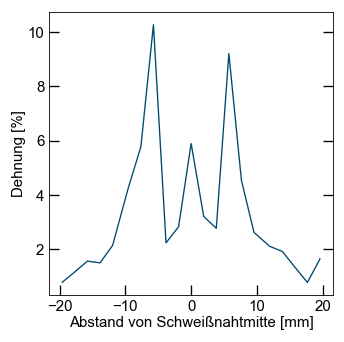

In [262]:
fig, ax=subplots((8,8),1,1,6,6)
df=_6mmSG_points_smooth
ax.plot([(int(i.split('(')[1].split(',')[0] )-95)*resolution for i in df.columns],df.loc[df.index[-1],:])#,edgecolor='k',hatch='//')
ax.set_ylabel('Dehnung [%]')
ax.set_xlabel('Abstand von Schweißnahtmitte [mm]')
plt.show()
mult_save(fig,exportpath,'Dehnungsprofil_auf_Linie_6mmSG')

fig, ax=subplots((8,8),1,1,6,6)
df=_8mmSG_points_smooth
ax.plot([(int(i.split('(')[1].split(',')[0] )-115)*resolution for i in df.columns],df.loc[df.index[-1],:])#,edgecolor='k',hatch='//')
ax.set_ylabel('Dehnung [%]')
ax.set_xlabel('Abstand von Schweißnahtmitte [mm]')
plt.show()
mult_save(fig,exportpath,'Dehnungsprofil_auf_Linie_8mmSG')

Wasserfalldiagramm Lokale und Temporale Auflösung

(108, 21)
(108, 21)
(130, 21)
(130, 21)


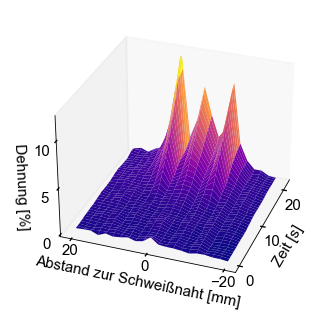

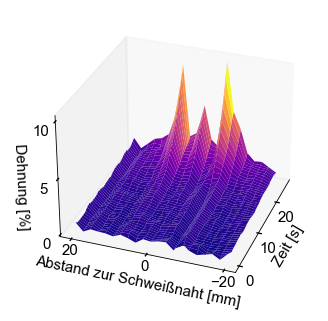

In [263]:
def ax_setup(fig,margin_left,margin_bottom,boxwidth,boxheight):#cm input
    fig_width,fig_height=fig.get_size_inches()
    #width=(fig_width*cm)-margin_left-margin_right
    #height=(fig_height*cm)-margin_top-margin_bottom
    position_size=[margin_left/cm,margin_bottom/cm,boxwidth/cm,boxheight/cm]#inch
    axis=fig.add_axes(real_to_relative(fig,position_size),projection='3d')
    return axis
fig,ax=subplots((8,8),1,1,6,6)
df=_6mmSG_points_smooth
print(df.shape)
X,Y=np.meshgrid(range(len(df.columns)),range(len(df.index)))
print(X.shape)
ax.plot_surface(Y/5,(X*2)-20,df,cmap='plasma')
ax.view_init(30, 200)
ax.grid(False)
ax.set_xlabel('Zeit [s]',labelpad=-8)
ax.set_ylabel('Abstand zur Schweißnaht [mm]',labelpad=-10)
ax.set_yticks([-20,0,20])
ax.set_xticks([0,10,20])
ax.set_zticks([0,5,10])
ax.tick_params(axis='both', which='major', pad=-3)
ax.tick_params(axis='y', which='major', pad=-6)
ax.set_zlabel('Dehnung [%]',labelpad=-8)
mult_save(fig,exportpath,'Wasserfall_6mmSG')


fig,ax=subplots((8,8),1,1,6,6)
df=_8mmSG_points_smooth
print(df.shape)
X,Y=np.meshgrid(range(len(df.columns)),range(len(df.index)))
print(X.shape)
ax.plot_surface(Y/5,(X*2)-20,df,cmap='plasma')
ax.view_init(30, 200)
ax.grid(False)
ax.set_xlabel('Zeit [s]',labelpad=-8)
ax.set_ylabel('Abstand zur Schweißnaht [mm]',labelpad=-10)
ax.set_yticks([-20,0,20])
ax.set_xticks([0,10,20])
ax.set_zticks([0,5,10])
ax.tick_params(axis='both', which='major', pad=-3)
ax.tick_params(axis='y', which='major', pad=-6)
ax.set_zlabel('Dehnung [%]',labelpad=-8)
mult_save(fig,exportpath,'Wasserfall_8mmSG')

dreilinienkonzept

[8, 9, 10, 11, 12] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


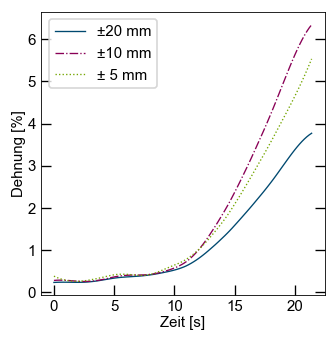

[8, 9, 10, 11, 12] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


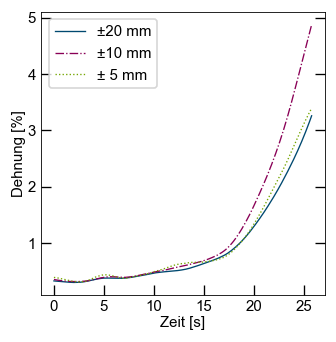

[8, 9, 10, 11, 12] [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


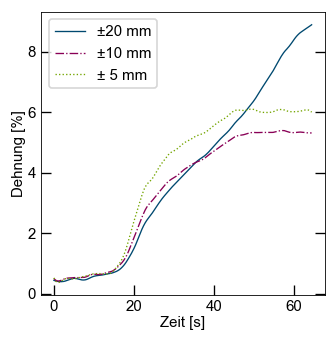

In [268]:
def ax_setup(fig,margin_left,margin_bottom,boxwidth,boxheight):#cm input
    fig_width,fig_height=fig.get_size_inches()
    #width=(fig_width*cm)-margin_left-margin_right
    #height=(fig_height*cm)-margin_top-margin_bottom
    position_size=[margin_left/cm,margin_bottom/cm,boxwidth/cm,boxheight/cm]#inch
    axis=fig.add_axes(real_to_relative(fig,position_size))
    return axis
df=_6mmSG_points_smooth
zone1=list(range(len(df.columns)))
zone1=zone1[int(len(df.columns)*2.5/6):int(len(df.columns)*3.5/6)+1]
zone2=list(range(len(df.columns)))
zone2=zone2[int(len(df.columns)/4):int(len(df.columns)*3/4)+1]
zone3=list(range(len(df.columns)))

print(zone1,zone2,zone3)
from scipy.signal import savgol_filter as savgol
fig,ax=subplots((8,8),1,1,6,6)
ax.plot(np.arange(len(df.index))/5,savgol(df.iloc[:,zone3].mean(axis=1),21,3),label='±20 mm')
ax.plot(np.arange(len(df.index))/5,savgol(df.iloc[:,zone2].mean(axis=1),21,3),label='±10 mm')
ax.plot(np.arange(len(df.index))/5,savgol(df.iloc[:,zone1].mean(axis=1),21,3),label='± 5 mm')
ax.set_xlabel('Zeit [s]')
ax.set_ylabel('Dehnung [%]')
ax.legend()
plt.show()
mult_save(fig,exportpath,'zonenverlauf_6mmSG')


df=_8mmSG_points_smooth
zone1=list(range(len(df.columns)))
zone1=zone1[int(len(df.columns)*2.5/6):int(len(df.columns)*3.5/6)+1]
zone2=list(range(len(df.columns)))
zone2=zone2[int(len(df.columns)/4):int(len(df.columns)*3/4)+1]
zone3=list(range(len(df.columns)))

print(zone1,zone2,zone3)
from scipy.signal import savgol_filter as savgol
fig,ax=subplots((8,8),1,1,6,6)
ax.plot(np.arange(len(df.index))/5,savgol(df.iloc[:,zone3].mean(axis=1),21,3),label='±20 mm')
ax.plot(np.arange(len(df.index))/5,savgol(df.iloc[:,zone2].mean(axis=1),21,3),label='±10 mm')
ax.plot(np.arange(len(df.index))/5,savgol(df.iloc[:,zone1].mean(axis=1),21,3),label='± 5 mm')
ax.set_xlabel('Zeit [s]')
ax.set_ylabel('Dehnung [%]')
ax.legend()
plt.show()
mult_save(fig,exportpath,'zonenverlauf_8mmSG')

df=_8mmGW_points_smooth
zone1=list(range(len(df.columns)))
zone1=zone1[int(len(df.columns)*2.5/6):int(len(df.columns)*3.5/6)+1]
zone2=list(range(len(df.columns)))
zone2=zone2[int(len(df.columns)/4):int(len(df.columns)*3/4)+1]
zone3=list(range(len(df.columns)))

print(zone1,zone2,zone3)
from scipy.signal import savgol_filter as savgol
fig,ax=subplots((8,8),1,1,6,6)
ax.plot(np.arange(len(df.index))/5,savgol(df.iloc[:,zone3].mean(axis=1),21,3),label='±20 mm')
ax.plot(np.arange(len(df.index))/5,savgol(df.iloc[:,zone2].mean(axis=1),21,3),label='±10 mm')
ax.plot(np.arange(len(df.index))/5,savgol(df.iloc[:,zone1].mean(axis=1),21,3),label='± 5 mm')
ax.set_xlabel('Zeit [s]')
ax.set_ylabel('Dehnung [%]')
ax.legend()
plt.show()
mult_save(fig,exportpath,'zonenverlauf_8mmGW')

_6mmSG
5.5


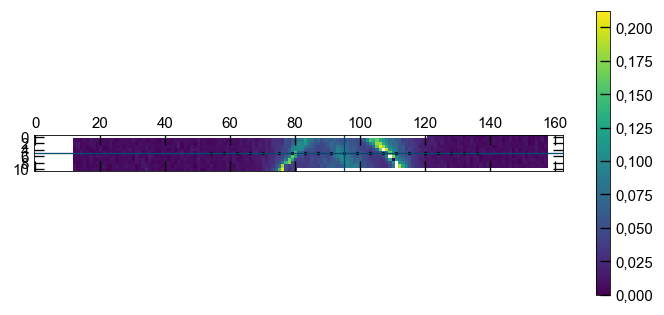

In [204]:
fig,ax=subplots((16,8),1.5,1,14,6)
print('_6mmSG')
a=_6mmSG.loc[_6mmSG.index[-1] ,('strains','strain_p1')]
x=_6mmSG.loc[_6mmSG.index[-1] ,(  'coordinates',       'coordinate_x')]
mask=np.where(x==0,True,False)
maskeda=np.ma.masked_array(a,mask)
maskedx=np.ma.masked_array(x,mask)

resolution=get_resolution(maskedx)

xmean=crop(maskeda).shape[0]/2
bs=ax.matshow(crop(maskeda))#,crop(maskedx),crop(maskeda))
for tuples in sorted(get_measurement_points(resolution,40,95,2,int(xmean))):
    ax.scatter(tuples[0],tuples[1])
ax.axhline(int(xmean))
ax.axvline(95)
#plt.axis('equal')
#ax.matshow(a)
plt.colorbar(bs)
print(xmean)

plt.show()


In [ ]:
resolution

In [ ]:
fig,ax=subplots()

In [ ]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([cmap1, cmap2])

In [269]:
from imports import *
svg2emf(r'M:\Öff gef Forschung\Projekte\AiF DVS\A0316_AIF 20439_Festigkeitsbewertung_chr\Abschlussbericht, Veröff\2022-DVS-Congress\Bilder')


C:/Program Files/Inkscape/bin/inkscape.exe --export-type=emf "M:/Öff gef Forschung/Projekte/AiF DVS/A0316_AIF 20439_Festigkeitsbewertung_chr/Abschlussbericht, Veröff/2022-DVS-Congress/Bilder/blumenstrauß_6mmSG.svg"
C:/Program Files/Inkscape/bin/inkscape.exe --export-type=emf "M:/Öff gef Forschung/Projekte/AiF DVS/A0316_AIF 20439_Festigkeitsbewertung_chr/Abschlussbericht, Veröff/2022-DVS-Congress/Bilder/blumenstrauß_8mmSG.svg"
C:/Program Files/Inkscape/bin/inkscape.exe --export-type=emf "M:/Öff gef Forschung/Projekte/AiF DVS/A0316_AIF 20439_Festigkeitsbewertung_chr/Abschlussbericht, Veröff/2022-DVS-Congress/Bilder/Dehnungsprofil_auf_Linie_6mmSG.svg"
C:/Program Files/Inkscape/bin/inkscape.exe --export-type=emf "M:/Öff gef Forschung/Projekte/AiF DVS/A0316_AIF 20439_Festigkeitsbewertung_chr/Abschlussbericht, Veröff/2022-DVS-Congress/Bilder/Dehnungsprofil_auf_Linie_8mmSG.svg"
C:/Program Files/Inkscape/bin/inkscape.exe --export-type=emf "M:/Öff gef Forschung/Projekte/AiF DVS/A0316_AIF 20439_